In [52]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv("../../data/tech-companies.csv")

In [54]:
df.head()


,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors


In [55]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB
None


In [56]:
print(df.isnull().sum())
# we have no null values

Ranking       0
Company       0
Market Cap    0
Stock         0
Country       0
Sector        0
Industry      0
dtype: int64


In [57]:
df['Market Cap']

0       $2.866 T
1       $2.755 T
2       $1.186 T
3      $495.95 B
4      $487.64 B
         ...    
995     $825.4 M
996     $819.5 M
997     $819.3 M
998     $816.1 M
999     $811.5 M
Name: Market Cap, Length: 1000, dtype: object

In [58]:
# Function to extract the suffix (e.g., "T", "B","M") from the market cap
def extract_suffix(market_cap):
    if isinstance(market_cap, str):
        return market_cap[-1]  # Extract the last character (e.g., "T", "B","M")
    return None

# Apply the function to the 'Market Cap' column and get the unique suffixes
suffixes = df['Market Cap'].apply(extract_suffix).unique()

print(suffixes)

['T' 'B' 'M']


In [59]:
# convert the market cap suffex into their suitable numric values and remove the $ sign (convert all to billions)

def convert_market_cap(market_cap):
    if 'T' in market_cap:
        return float(market_cap.replace('$', '').replace('T', '').strip()) * 1e12 / 1e9  # divinde by billions
    elif 'B' in market_cap:
        return float(market_cap.replace('$', '').replace('B', '').strip()) # no need to to do anything here 
    elif 'M' in market_cap:
        return float(market_cap.replace('$', '').replace('M', '').strip()) * 1e6 / 1e9 # divide by billions
    else:
        return None

In [60]:
df['Market Cap Numeric'] = df['Market Cap'].apply(convert_market_cap)

In [61]:
df.head()

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry,Market Cap Numeric
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics,2866.00
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure,2755.00
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors,1186.00
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors,495.95
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors,487.64


In [62]:
Sectors = df['Sector'].unique()
print(Sectors)

['Technology']


In [63]:
Industries = df['Industry'].unique()
print(Industries)

['Consumer Electronics' 'Software—Infrastructure' 'Semiconductors'
 'Semiconductor Equipment & Materials' 'Software—Application'
 'Information Technology Services' 'Communication Equipment'
 'Scientific & Technical Instruments' 'Computer Hardware'
 'Electronic Components' 'Solar' 'Electronics & Computer Distribution']


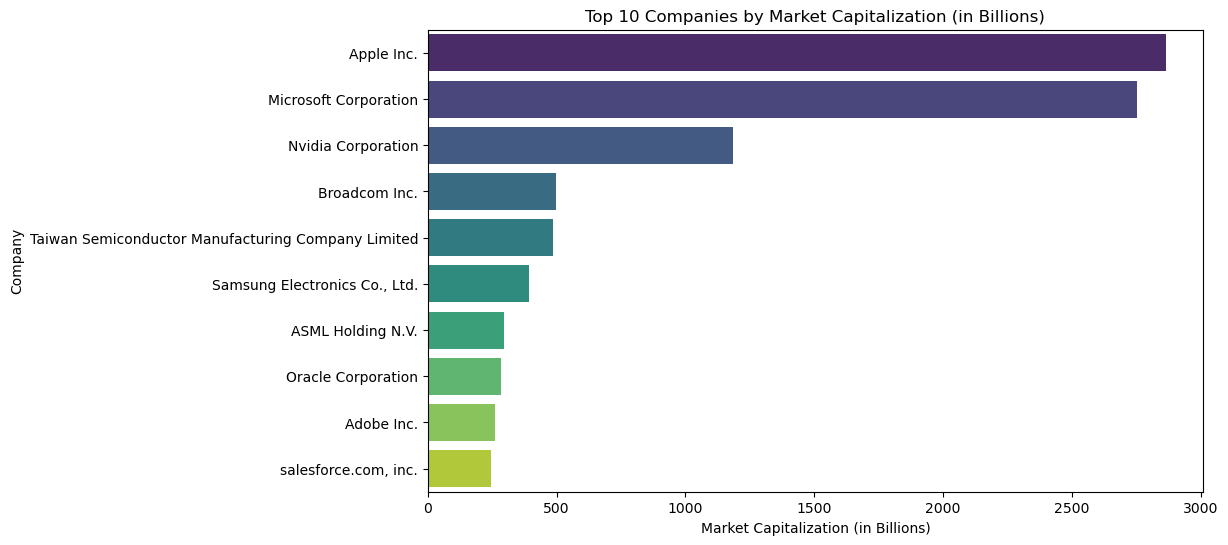

In [64]:
top_10 = df[['Company', 'Market Cap Numeric']].head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Market Cap Numeric', y='Company', data=top_10, palette='viridis')
plt.title('Top 10 Companies by Market Capitalization (in Billions)')
plt.xlabel('Market Capitalization (in Billions)')
plt.ylabel('Company')
plt.show()

# Apple hold the largest market share

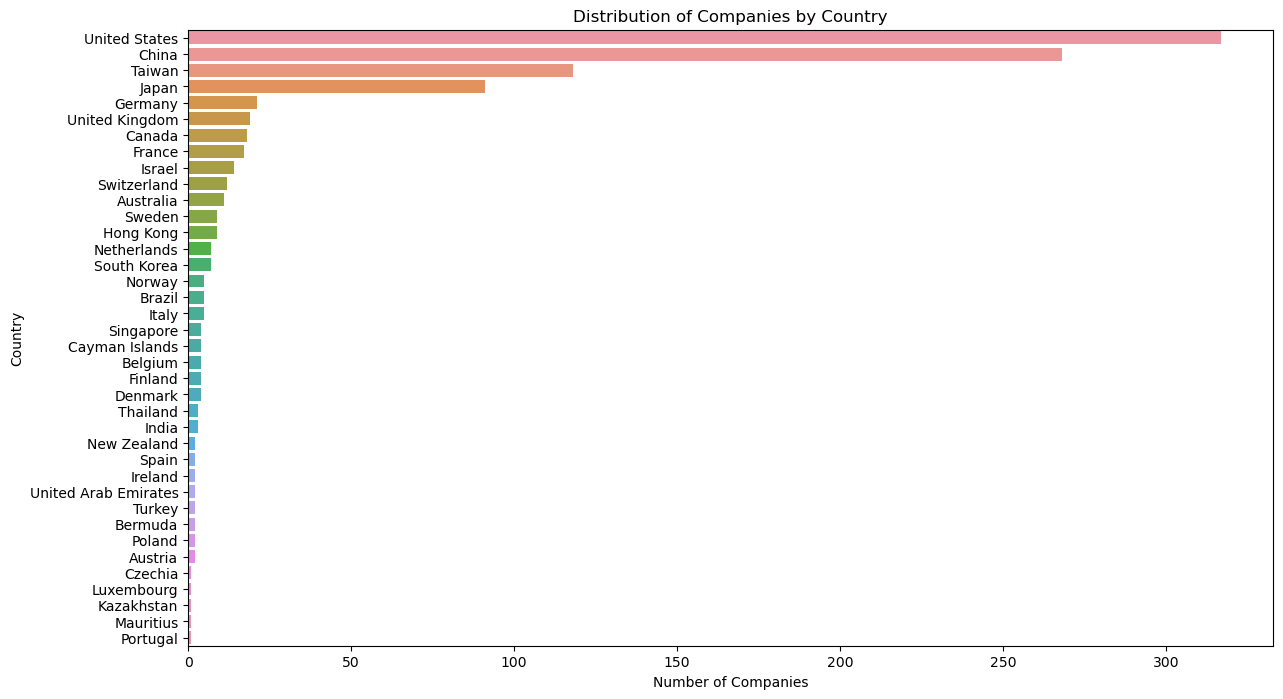

In [65]:
# Distribution of companies by country
plt.figure(figsize=(14, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Distribution of Companies by Country')
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.show()


# we can also get the top 10 

# the leading country in term of number of companies in the Tech space is the USA

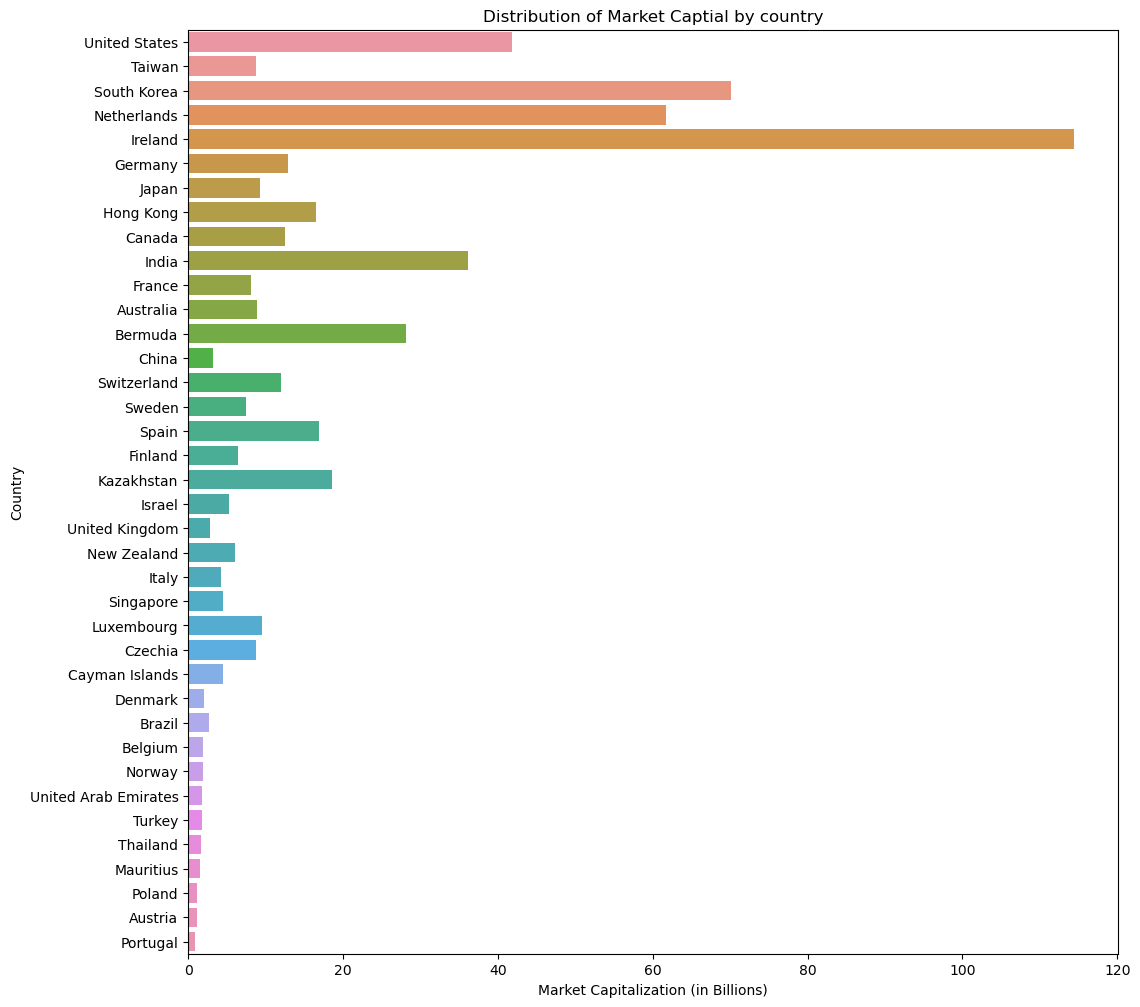

In [104]:
# Distribution of Market Captial by country

plt.figure(figsize=(12, 12))
sns.barplot(x='Market Cap Numeric', y='Country', data=df,ci=None)
plt.title('Distribution of Market Captial by country')
plt.xlabel('Market Capitalization (in Billions)')
plt.ylabel('Country')
plt.show()

# the leading country in term of Market Capital in the Tech space is Ireland

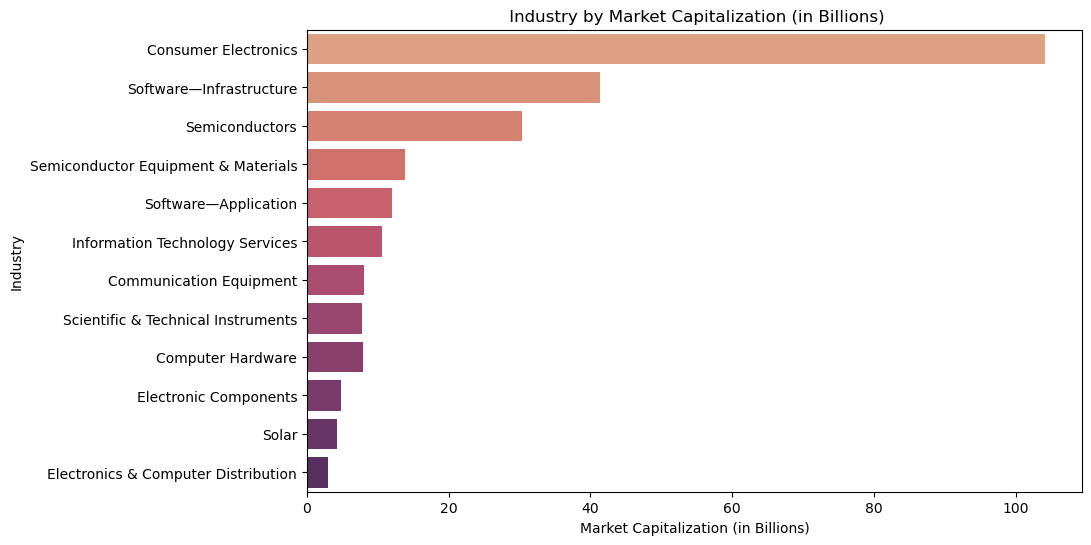

In [103]:
#Industry by Market Capitalization

plt.figure(figsize=(10, 6))
sns.barplot(x='Market Cap Numeric', y='Industry', data=df, palette='flare',ci=None)
plt.title(' Industry by Market Capitalization (in Billions)')
plt.xlabel('Market Capitalization (in Billions)')
plt.ylabel('Industry')
plt.show()

# the leading sector in term of Market Cap is 'Consumer Electronics'

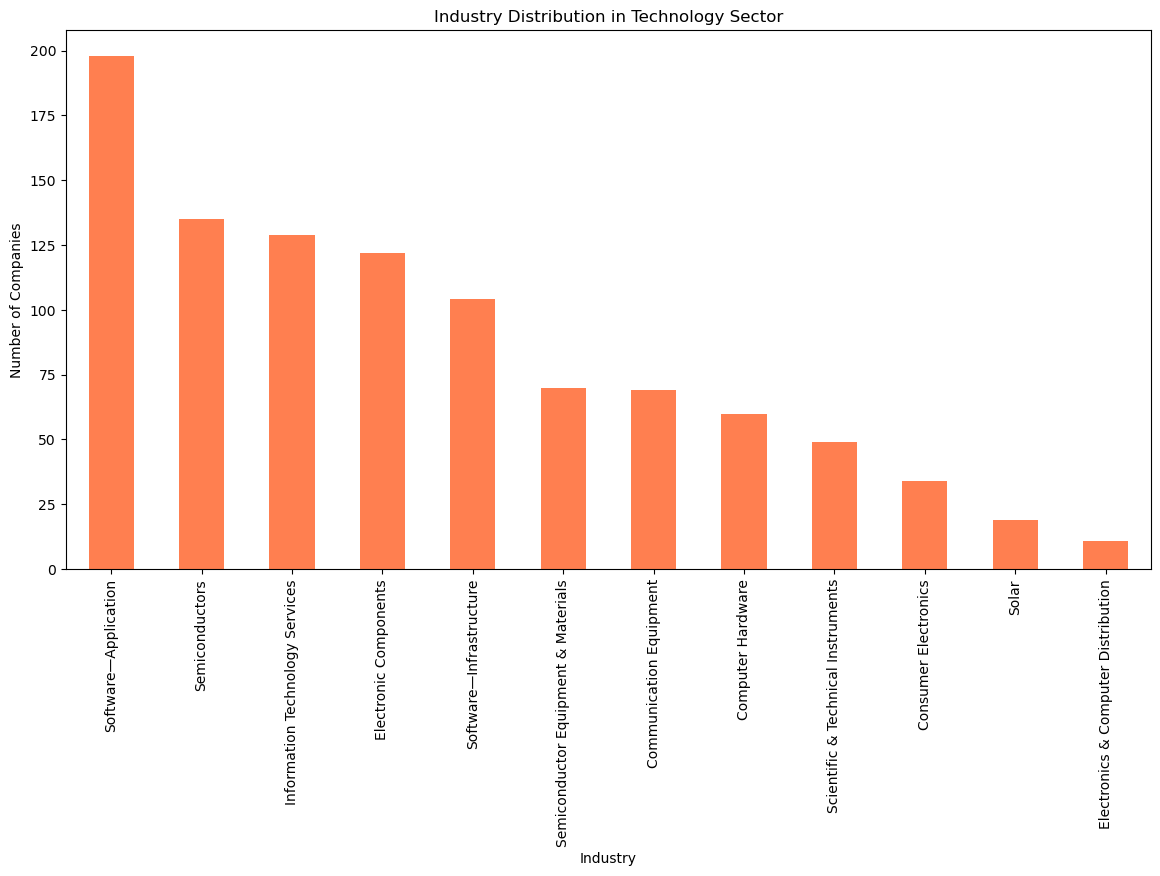

In [68]:
plt.figure(figsize=(14, 7))
tech_industries = df['Industry'].value_counts()
tech_industries.plot(kind='bar', color='coral')
plt.title('Industry Distribution in Technology Sector')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.show()

# the leading sector in term of company numbers is 'Software'

    Read Market Cap Historical data

In [69]:
df_hist = pd.read_csv('../../data/MarketCap_History_Top-116_Companies.csv')


In [70]:
# convert the market cap to billions
df_hist['marketcap_in_billions'] = round(df_hist['marketCap'] / 1_000_000_000, 2)


In [71]:
df_hist.head()


,symbol,date,marketCap,marketcap_in_billions
0,AZPN,2024-08-30,14822935120,14.82
1,AZPN,2024-08-29,14528552920,14.53
2,AZPN,2024-08-28,13894839840,13.89
3,AZPN,2024-08-27,13570702880,13.57
4,AZPN,2024-08-26,13539048880,13.54


In [72]:
#merge with the original dataset based on the symbol

df_merge = pd.merge(df_hist, df, left_on='symbol', right_on='Stock', how='inner')


In [73]:
df_merge.head()


,symbol,date,marketCap,marketcap_in_billions,Ranking,Company,Market Cap,Stock,Country,Sector,Industry,Market Cap Numeric
0,AZPN,2024-08-30,14822935120,14.82,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27
1,AZPN,2024-08-29,14528552920,14.53,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27
2,AZPN,2024-08-28,13894839840,13.89,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27
3,AZPN,2024-08-27,13570702880,13.57,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27
4,AZPN,2024-08-26,13539048880,13.54,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27


In [74]:
#drop the not needed columns

df_merge = df_merge.drop(columns=['symbol','Ranking','marketCap','Market Cap Numeric','Market Cap','Country'])

In [75]:
df_merge.head()


,date,marketcap_in_billions,Company,Stock,Sector,Industry
0,2024-08-30,14.82,"Aspen Technology, Inc.",AZPN,Technology,Software—Application
1,2024-08-29,14.53,"Aspen Technology, Inc.",AZPN,Technology,Software—Application
2,2024-08-28,13.89,"Aspen Technology, Inc.",AZPN,Technology,Software—Application
3,2024-08-27,13.57,"Aspen Technology, Inc.",AZPN,Technology,Software—Application
4,2024-08-26,13.54,"Aspen Technology, Inc.",AZPN,Technology,Software—Application


In [77]:
#convert the date column into datetime for analysis 

df_merge['date'] = pd.to_datetime(df_merge['date'])


In [78]:
#extract the year from the date

df_merge['year'] = df_merge['date'].dt.year

In [79]:
df_merge.head()


,date,marketcap_in_billions,Company,Stock,Sector,Industry,year
0,2024-08-30,14.82,"Aspen Technology, Inc.",AZPN,Technology,Software—Application,2024
1,2024-08-29,14.53,"Aspen Technology, Inc.",AZPN,Technology,Software—Application,2024
2,2024-08-28,13.89,"Aspen Technology, Inc.",AZPN,Technology,Software—Application,2024
3,2024-08-27,13.57,"Aspen Technology, Inc.",AZPN,Technology,Software—Application,2024
4,2024-08-26,13.54,"Aspen Technology, Inc.",AZPN,Technology,Software—Application,2024


In [80]:
#group the data by industry and year, and sum the market cap

grouped_yr_ind = df_merge.groupby(['year', 'Industry'])['marketcap_in_billions'].sum().reset_index()


In [81]:
grouped_yr_ind.head()

,year,Industry,marketcap_in_billions
0,2021,Communication Equipment,84665.53
1,2021,Computer Hardware,37130.15
2,2021,Consumer Electronics,587799.34
3,2021,Electronic Components,21208.01
4,2021,Information Technology Services,124432.37


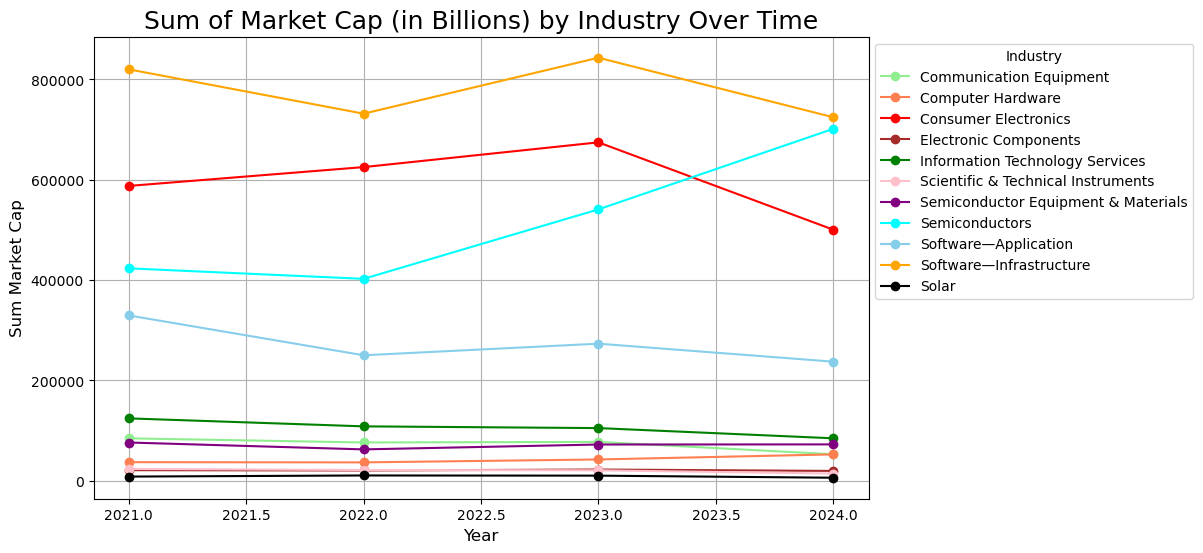

In [85]:
# visiualize the sum of market cap per year by industry

colors = {'Communication Equipment' : 'lightgreen',
'Computer Hardware' : 'coral',
'Consumer Electronics' : 'red',
'Electronic Components' : 'brown',
'Information Technology Services' : 'green',
'Scientific & Technical Instruments': 'pink',
'Semiconductor Equipment & Materials': 'purple',
'Semiconductors' : 'cyan',
'Software—Application' : 'skyblue',
'Software—Infrastructure' : 'orange',
'Solar': 'black'}

# Plot each industry individually
plt.figure(figsize=(10, 6))

# Iterate over each unique Industry in the grouped data
for industry in grouped_yr_ind['Industry'].unique():
    # Filter the data for the specific industry
    industry_data = grouped_yr_ind[grouped_yr_ind['Industry'] == industry]
    
    # Plot the data for this industry with corresponding color
    plt.plot(industry_data['year'], industry_data['marketcap_in_billions'], 
             marker='o', label=industry, color=colors.get(industry, 'gray'))  # default color if industry is missing

# Add titles and labels
plt.title('Sum of Market Cap (in Billions) by Industry Over Time', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sum Market Cap', fontsize=12)

# Customize legend
plt.legend(title='Industry', bbox_to_anchor=(1, 1), loc=2)

# Show grid and plot
plt.grid(True)
plt.show()

In [96]:
# group the data by year by company, and sum of market cap

grouped_yr_company = df_merge.groupby(['year', 'Company'])['marketcap_in_billions'].sum().reset_index()

In [97]:
# get the top 10 company based on the sum of market cap 

# Sort by year and market cap, then get the top 10 for each year
grouped_yr_company['rank'] = grouped_yr_company.groupby('year')['marketcap_in_billions'].rank(ascending=False, method='first')

# Filter to get only the top 10 companies per year
top_10_companies_per_year = grouped_yr_company[grouped_yr_company['rank'] <= 10]

# Reset the index to clean up the DataFrame
top_10_companies_per_year = top_10_companies_per_year.reset_index(drop=True)



In [98]:
top_10_companies_per_year.head()

,year,Company,marketcap_in_billions,rank
0,2021,Adobe Inc.,67370.52,4.0
1,2021,Apple Inc.,587799.34,1.0
2,2021,Broadcom Inc.,51234.34,9.0
3,2021,"Cisco Systems, Inc.",56539.14,8.0
4,2021,Intel Corporation,57125.78,7.0


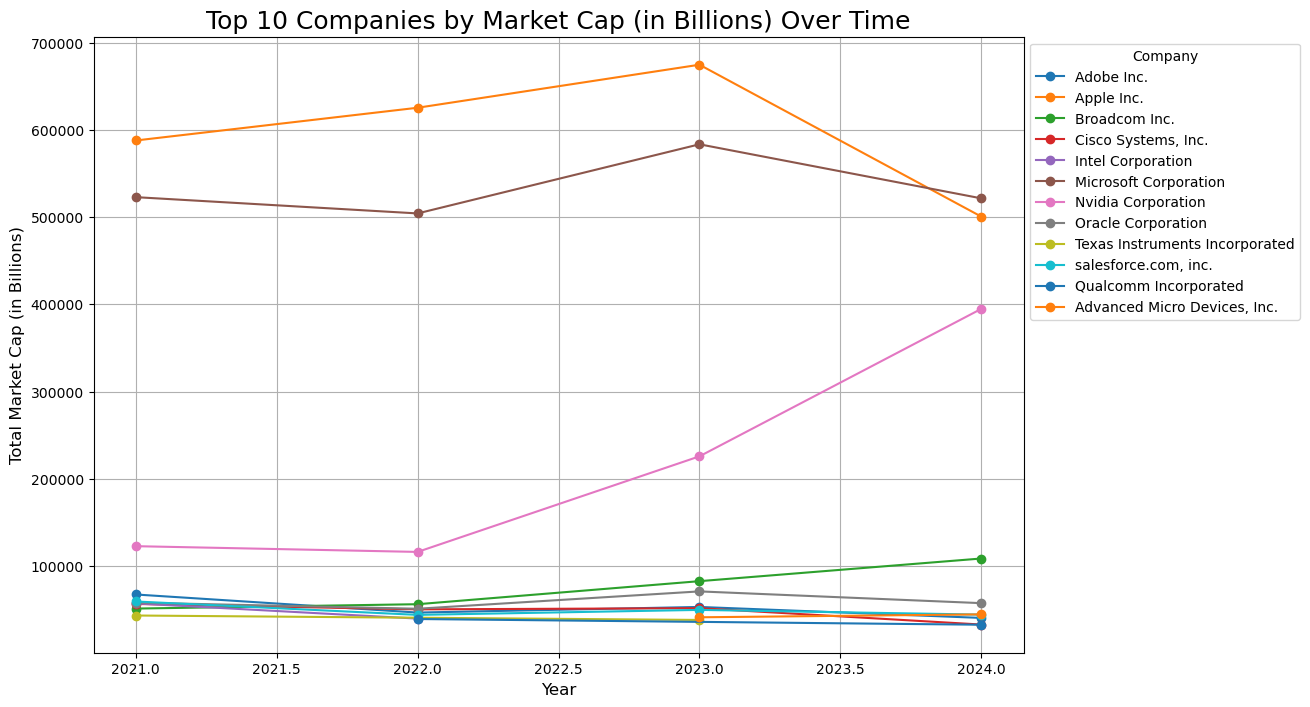

In [99]:

# Plot setup
plt.figure(figsize=(12, 8))

# Iterate over each unique company in the top 10 companies
for company in top_10_companies_per_year['Company'].unique():
    # Filter data for the specific company
    company_data = top_10_companies_per_year[top_10_companies_per_year['Company'] == company]
    
    # Plot the data for this company
    plt.plot(company_data['year'], company_data['marketcap_in_billions'], 
             marker='o', label=company)

# Add titles and labels
plt.title('Top 10 Companies by Market Cap (in Billions) Over Time', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Market Cap (in Billions)', fontsize=12)

# Customize legend
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc=2)

# Show grid and plot
plt.grid(True)
plt.show()

In [93]:
# from the above we can see that for sometime Apple had the highest Market Cap but then
#in 2024 Microsoft got higher market cap


In [100]:
# group the data by year by company, and mean of market cap

grouped_yr_company_mean = df_merge.groupby(['year', 'Company'])['marketcap_in_billions'].mean().reset_index()

In [101]:
# get the top 10 company based on the mean of market cap 

# Sort by year and market cap, then get the top 10 for each year
grouped_yr_company_mean['rank'] = grouped_yr_company_mean.groupby('year')['marketcap_in_billions'].rank(ascending=False, method='first')

# Filter to get only the top 10 companies per year
top_10_companies_per_year_mean = grouped_yr_company_mean[grouped_yr_company_mean['rank'] <= 10]

# Reset the index to clean up the DataFrame
top_10_companies_per_year_mean = top_10_companies_per_year_mean.reset_index(drop=True)

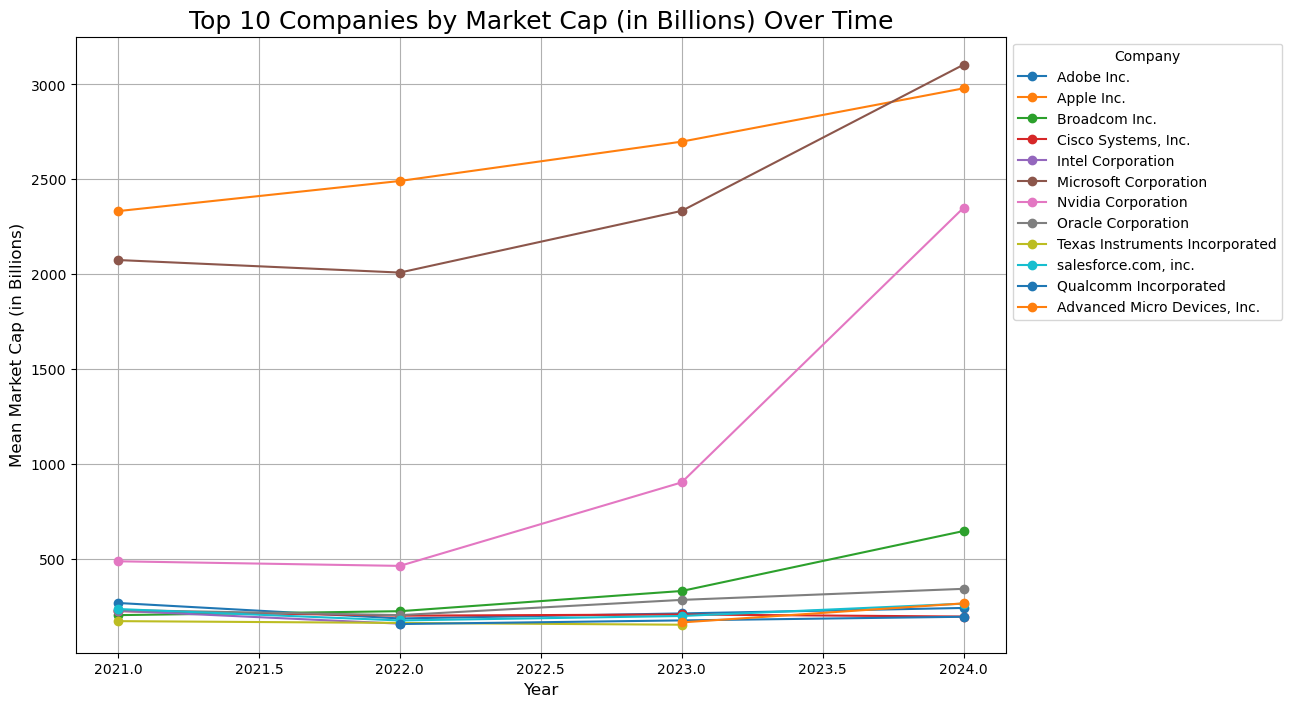

In [102]:

# Plot setup
plt.figure(figsize=(12, 8))

# Iterate over each unique company in the top 10 companies
for company in top_10_companies_per_year_mean['Company'].unique():
    # Filter data for the specific company
    company_data_mean = top_10_companies_per_year_mean[top_10_companies_per_year_mean['Company'] == company]
    
    # Plot the data for this company
    plt.plot(company_data_mean['year'], company_data_mean['marketcap_in_billions'], 
             marker='o', label=company)

# Add titles and labels
plt.title('Top 10 Companies by Market Cap (in Billions) Over Time', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Market Cap (in Billions)', fontsize=12)

# Customize legend
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc=2)

# Show grid and plot
plt.grid(True)
plt.show()

In [105]:
# from the above visualization Apple has a consistant growth over time
# and on the other hand both Microsoft and Nvidia are rising in ranking especially Nvidia quite fast